## Ques 1 Consider the entire Yale Faces datase

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from random import sample
import shutil
from zipfile import ZipFile
import warnings
warnings.filterwarnings("ignore") 

In [4]:
my_dir = os.getcwd() 
zip_folder = os.path.join(my_dir,"yalefaces.zip")
print("Path to the zipped folder is {}".format(zip_folder))
with ZipFile(zip_folder, 'r') as zip: 
    zip.extractall()

Path to the zipped folder is /Users/udaysingh/Desktop/IIT/Dimensionality Reduction/Hashing assignment /yalefaces.zip


['subject04.leftlight', 'subject01.wink', 'subject06.surprised', 'subject07.glasses', 'subject15.rightlight', 'subject12.surprised', 'subject10.leftlight', 'subject06.happy', 'subject03.centerlight', 'subject09.rightlight', 'subject01.normal', 'subject09.leftlight', 'subject13.normal', 'subject04.happy', 'subject14.noglasses', 'subject15.sleepy', 'subject04.rightlight', 'subject07.sleepy', 'subject11.normal', 'subject13.centerlight', 'subject03.normal', 'subject02.leftlight', 'subject05.sleepy', 'subject01.rightlight', 'subject14.surprised', 'subject09.sleepy', 'subject01.gif', 'subject06.glasses', 'subject02.happy', 'subject12.noglasses', 'subject10.rightlight', 'subject06.noglasses', 'subject09.sad', 'subject06.centerlight', 'subject08.sad', 'subject13.sleepy', 'subject13.surprised', 'subject11.leftlight', 'subject05.happy', 'subject05.leftlight', 'subject05.centerlight', 'subject07.surprised', 'subject01.sleepy', 'subject07.normal', 'subject15.normal', 'subject07.wink', 'subject06.r

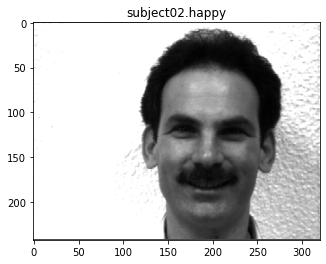

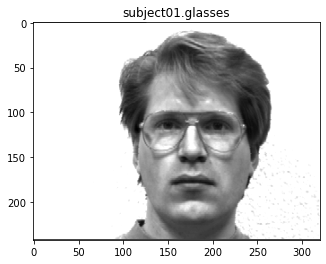

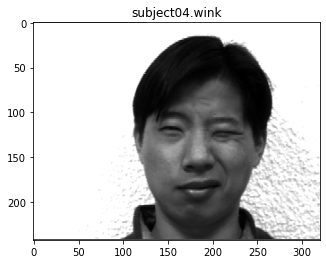

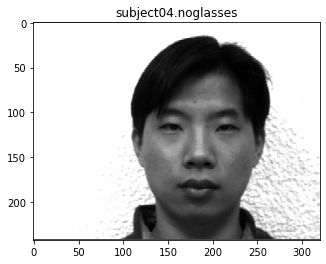

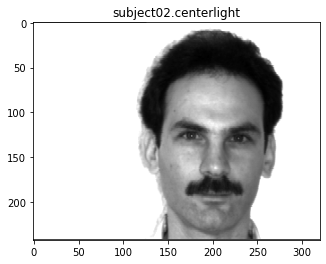

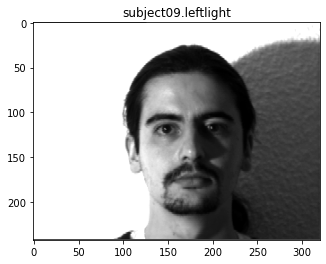

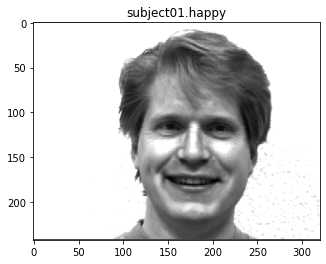

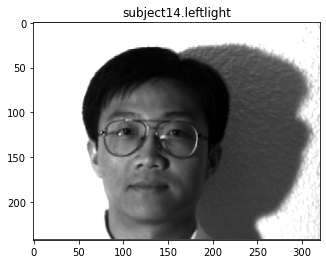

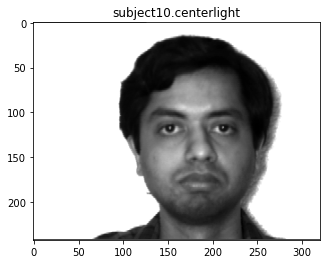

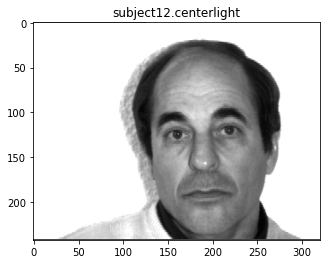

In [5]:
data_folder = os.path.join(my_dir,"yalefaces")
file_list = os.listdir(data_folder)
print(file_list)
sample_images = sample(file_list,10) 
for img_name in sample_images:
    image_path = os.path.join(data_folder,img_name)
    image = mpimg.imread(image_path)
    plt.imshow(image,cmap="gray")
    plt.title(img_name)
    plt.show()

In [6]:
train_folder_path = os.path.join(my_dir,"Faces_Train")
test_folder_path = os.path.join(my_dir,"Faces_Test")

## Delete the folders if they exist already
if os.path.exists(train_folder_path):
    shutil.rmtree(train_folder_path)

if os.path.exists(test_folder_path):
    shutil.rmtree(test_folder_path)

os.mkdir(train_folder_path)  ## Creates a new directory
os.mkdir(test_folder_path) ## Creates a new directory

idx_list = [str(i).zfill(2) for i in range(1,16,1)] 
print(idx_list)

file_name_list = [[] for i in range(15)]

for i in range(len(idx_list)):
    for fname in file_list:
        if fname.startswith("subject"+idx_list[i]):
            file_name_list[i].append(os.path.join(data_folder,fname))

print(file_name_list)

for i in range(len(idx_list)):
    ls = file_name_list[i]  
    test_idx = np.random.choice(11)  
    test_file = ls[test_idx]
    shutil.copy(test_file,test_folder_path)
    
    ls.remove(ls[test_idx])
    
    for train_file in ls:
        shutil.copy(train_file,train_folder_path)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15']
[['/Users/udaysingh/Desktop/IIT/Dimensionality Reduction/Hashing assignment /yalefaces/subject01.wink', '/Users/udaysingh/Desktop/IIT/Dimensionality Reduction/Hashing assignment /yalefaces/subject01.normal', '/Users/udaysingh/Desktop/IIT/Dimensionality Reduction/Hashing assignment /yalefaces/subject01.rightlight', '/Users/udaysingh/Desktop/IIT/Dimensionality Reduction/Hashing assignment /yalefaces/subject01.gif', '/Users/udaysingh/Desktop/IIT/Dimensionality Reduction/Hashing assignment /yalefaces/subject01.sleepy', '/Users/udaysingh/Desktop/IIT/Dimensionality Reduction/Hashing assignment /yalefaces/subject01.noglasses', '/Users/udaysingh/Desktop/IIT/Dimensionality Reduction/Hashing assignment /yalefaces/subject01.surprised', '/Users/udaysingh/Desktop/IIT/Dimensionality Reduction/Hashing assignment /yalefaces/subject01.happy', '/Users/udaysingh/Desktop/IIT/Dimensionality Reduction/Hashing assignme

In [11]:
train_files_list = os.listdir(train_folder_path)
#print(train_files_list)
train_ls = []
for file in train_files_list:
    img_file = os.path.join(train_folder_path,file)
    arr = mpimg.imread(img_file)
    #print(arr.shape)
    arr = arr.reshape(1,arr.shape[0]*arr.shape[1]) ## Convert to a 1D matrix
    train_ls.append(np.ravel(arr)) ## Before appending, convert the 1D martix to a 1d array using np.ravel 
train_mat = np.matrix(train_ls)
print(train_mat.shape)
mean_img = np.mean(train_mat,axis=0)
print(mean_img.shape)
cov = np.cov(train_mat)
print(cov.shape)
eig_val,eig_vec = np.linalg.eig(cov)
#print(eig_vec)

(151, 77760)
(1, 77760)
(151, 151)


In [14]:
eigen_vec_ls = []
#eig1 = train_mat.T@eig_vec[:,0]
#print(eig1.shape)
for i in range(eig_vec.shape[1]):
    eig1 = train_mat.T@eig_vec[:,i]
    eig1 = eig1/eig_val[i]
    eigen_vec_ls.append(np.ravel(eig1))
#print(eigen_vec_ls)

In [15]:
sort_idx = np.argsort(eig_val) ## indices for eigenvalues which are in ascending order
sort_idx = sort_idx[::-1]

eig_val_sum = np.sum(eig_val)
temp_sum = 0
principal_eig_vec = []
principal_eig_val = []
i=0
while(temp_sum<0.95*eig_val_sum):
    principal_eig_vec.append(eigen_vec_ls[sort_idx[i]])
    principal_eig_val.append(eig_val[sort_idx[i]])
    temp_sum += eig_val[sort_idx[i]]
    i += 1
print("Number of components is {}".format(i))

Number of components is 27


## Ques 2 . Obtain the transformation matrix Q and mean vector μ by performing Principal Component analysis on the dataset

In [20]:
Q_hat = np.matrix(principal_eig_vec)
mu=mean_img

In [22]:
print(Q_hat)
print(50*"*")
print(mu)

[[-0.00213628+0.j -0.00214584+0.j -0.00215453+0.j ... -0.0011606 +0.j
  -0.0011606 +0.j -0.0011606 +0.j]
 [ 0.00076256+0.j  0.00062818+0.j  0.00057229+0.j ...  0.00052167+0.j
   0.00052167+0.j  0.00052167+0.j]
 [ 0.00212362+0.j  0.00192319+0.j  0.00201045+0.j ...  0.00198341+0.j
   0.00198341+0.j  0.00198341+0.j]
 ...
 [-0.00815682+0.j -0.00716627+0.j -0.00072537+0.j ...  0.00273069+0.j
   0.00273069+0.j  0.00273069+0.j]
 [-0.01117205+0.j -0.01183327+0.j -0.01267277+0.j ... -0.01051208+0.j
  -0.01051208+0.j -0.01051208+0.j]
 [-0.01759235+0.j -0.01716898+0.j -0.01425696+0.j ... -0.00490404+0.j
  -0.00490404+0.j -0.00490404+0.j]]
**************************************************
[[123.49668874 123.45695364 123.66225166 ...  68.          68.
   68.        ]]


## Ques 3 Obtain the feature vector for every training set by using the transformation v = QT (x − μ).

In [18]:
test_files = os.listdir(test_folder_path)
feat_vec_ls = []
for file in test_files:
    img_file = os.path.join(test_folder_path,file)
    test_img = mpimg.imread(img_file)
    test_img = test_img.reshape(arr.shape[0]*arr.shape[1],1)
    test_img = test_img - mean_img.T
    #print(np.linalg.pinv(Q_hat).shape,test_img.shape)
    feat_vec = np.linalg.pinv(Q_hat).T@test_img
    feat_vec_ls.append(np.ravel(feat_vec))

In [26]:
vec_len=len(feat_vec_ls[0])

## Ques 4 Generate around 50 random vectors of dimension n_dim, where n_dim is the number of dimensions in v.

In [23]:
def genRandomHashVectors(m, length):  # Generate random unit vectors for Hashing
    hash_vector = []
    for i in range(m):
        v = np.random.uniform(-1,1,length)
        vcap = v / np.linalg.norm(v)
        hash_vector.append(vcap)
    return hash_vector   

In [49]:
hash_vec=genRandomHashVectors(50, vec_len)
hash_vec

[array([ 0.25956334, -0.10651101, -0.22698555,  0.03916336,  0.25613398,
         0.02884896,  0.06577081, -0.08021244, -0.28292535, -0.020084  ,
         0.05786674, -0.12584823, -0.26793007, -0.04892995,  0.09650368,
        -0.31856336, -0.31364023, -0.16327588,  0.2570544 , -0.23100725,
        -0.04466959,  0.11263216,  0.2932753 , -0.07302795, -0.31239588,
        -0.05249867,  0.23574135]),
 array([-0.31522456,  0.17887507, -0.05068928, -0.28091779, -0.12996227,
        -0.32549543,  0.09240869, -0.25971992, -0.34134062,  0.16229254,
         0.02070141, -0.14267067,  0.04704728,  0.0532294 ,  0.26775296,
        -0.10003316, -0.31490336,  0.01513827, -0.18728158,  0.00037242,
        -0.00223532, -0.24699639,  0.01043113,  0.32571055, -0.09109248,
        -0.04756993, -0.16032441]),
 array([-0.22817389, -0.05633698,  0.06931351,  0.28542398,  0.3219257 ,
        -0.09961926, -0.31945974, -0.30602761, -0.09028084,  0.16756373,
         0.08474592,  0.16659576,  0.07872999, -0.21

## Ques 5 Generate 50-bit hash representation of each of the feature vectors.

In [24]:
def localSensitiveHashing(hash_vector ,data): 
    hash_code = []
    for i in range(len(hash_vector)):
        if np.dot(data,hash_vector[i]) > 0:
            hash_code.append('1')
        else:
            hash_code.append('0')
    return hash_code 

In [51]:
localSensitiveHashing(hash_vec ,feat_vec_ls[1])

['1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0']

## Ques 6 Calculate the L1-norm distance between the hash representation of a par- ticular feature vector with the hash representation of other feature vectors and sort the vectors based on the distance values.

In [31]:
n= np.random.randint(1,vec_len)
list_1=[]
n

3

In [44]:
for i in range (len(feat_vec_ls)):
    list_1.append(np.linalg.norm((feat_vec_ls[i]- feat_vec_ls[n]),ord=1))

In [45]:
list_1.sort()

In [46]:
print(list_1)


[0.0, 0.0, 20220.477185194068, 20220.477185194068, 23356.306269758505, 23356.306269758505, 23510.900060132335, 23510.900060132335, 34341.1593736635, 34341.1593736635, 42593.6666260543, 42593.6666260543, 50941.19255883314, 50941.19255883314, 51385.273635712634, 51385.273635712634, 54694.10926612627, 54694.10926612627, 56734.84127085847, 56734.84127085847, 66921.42220759811, 66921.42220759811, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 67927.59629896571, 73254.03678634735, 73254.03678634735, 78235.7217299641